<a href="https://colab.research.google.com/github/coryncates/Prediction-of-Product-Sales/blob/main/Copy_of_PredictionOfProdSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
  - Author: Cory N. Cates
## Project Overview
## Load and Inspect Data


# Questions to be addressed for this exercise:
For Part 4, your task is to inspect the features:  For feature inspection, we want to be fully aware of any null values present so that we can make informed choices about data preparation for machine learning in the next course. Therefore, before you proceed,  

Remove the placeholders you added in week 2 and replace them with null values.
This will allow our functions to report the presence and frequency of null values as part of our EDA.​

For each feature:

- Add a new markdown header.
- Paste the feature's definition from the data dictionary into a markdown cell.
- Create a univariate visualization showing the distribution of values/categories.
  - You may use the EDA functions from the previous lessons or create your own visualizations.
- Answer the following questions from the Feature Inspection lesson in a markdown cell:
  - What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - Is the feature constant or quasi-constant?
  - What is the cardinality? Is it high (>10)?
  - Would we know this feature before the target is determined?
  - Is there a business case/understanding reason to exclude based on our business case?
- Create a multivariate visualization plotting each feature vs. the target.
You may use the EDA functions from the previous lessons or create your own visualizations.​
- Answer the following questions from the Feature Inspection lesson in a Markdown cell:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Does this feature appear to be a predictor of the target?

**Variable Name & Description**
- **Item_Identifier**	- Product ID
- **Item_Weight	Weight** - of product
- **Item_Fat_Content**	- Whether the product is low-fat or regular
- **Item_Visibility**	- The percentage of total display area of all products in a   
  store allocated to the particular product
- **Item_Type**	- The category to which the product belongs
- **Item_MRP**	- Maximum Retail Price (list price) of the product
- **Outlet_Identifier**	Store ID
- **Outlet_Establishment_Year**	- The year in which store was established
- **Outlet_Size**	- The size of the store in terms of ground area covered
- **Outlet_Location_Type**	- The type of area in which the store is located
- **Outlet_Type**	- Whether the outlet is a grocery store or some sort of     supermarket
- **Item_Outlet_Sales	Sales** - of the product in the particular store. This is the
  target variable to be predicted.

# Evaluate using the built in Coding Snippets ******************START****************

In [141]:
# Mount google drive and import necessary libraries

from google.colab import drive
drive.mount ('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function

def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df_predict[[x,y]].corr(numeric_only=True).round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

In [90]:
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax



In [91]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

In [92]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



******************END OF SNIPPET****************

In [93]:
# Save path of file and inspect data

fpath= ('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/sales_predictions_2023.csv')

df_predict = pd.read_csv(fpath)
df_predict.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [94]:
# Further data analysis
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- There are 8523 Rows with 12 columns

## Clean Data

In [95]:
# Getting shape of df
df_predict.shape

(8523, 12)

In [96]:
# Checking the variable data types

df_predict.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- There are zero Unamed columns.
- Nothing that stands out in regards to the datatypes.

In [97]:
# Checking for duplicates

df_predict.duplicated().sum()

0

In [98]:
# Checking for Missing values
df_predict.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [99]:
# Checking for Missing values

df_sum = df_predict.isna().sum()
df_sum

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are 1463 rows that are missing for Item_Weight and 2410 for Outlet_type

In [100]:
# Identify the percentage missing
df_perc = df_predict.isna().sum() / len(df_predict) * 100
df_perc.round(2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

<Axes: >

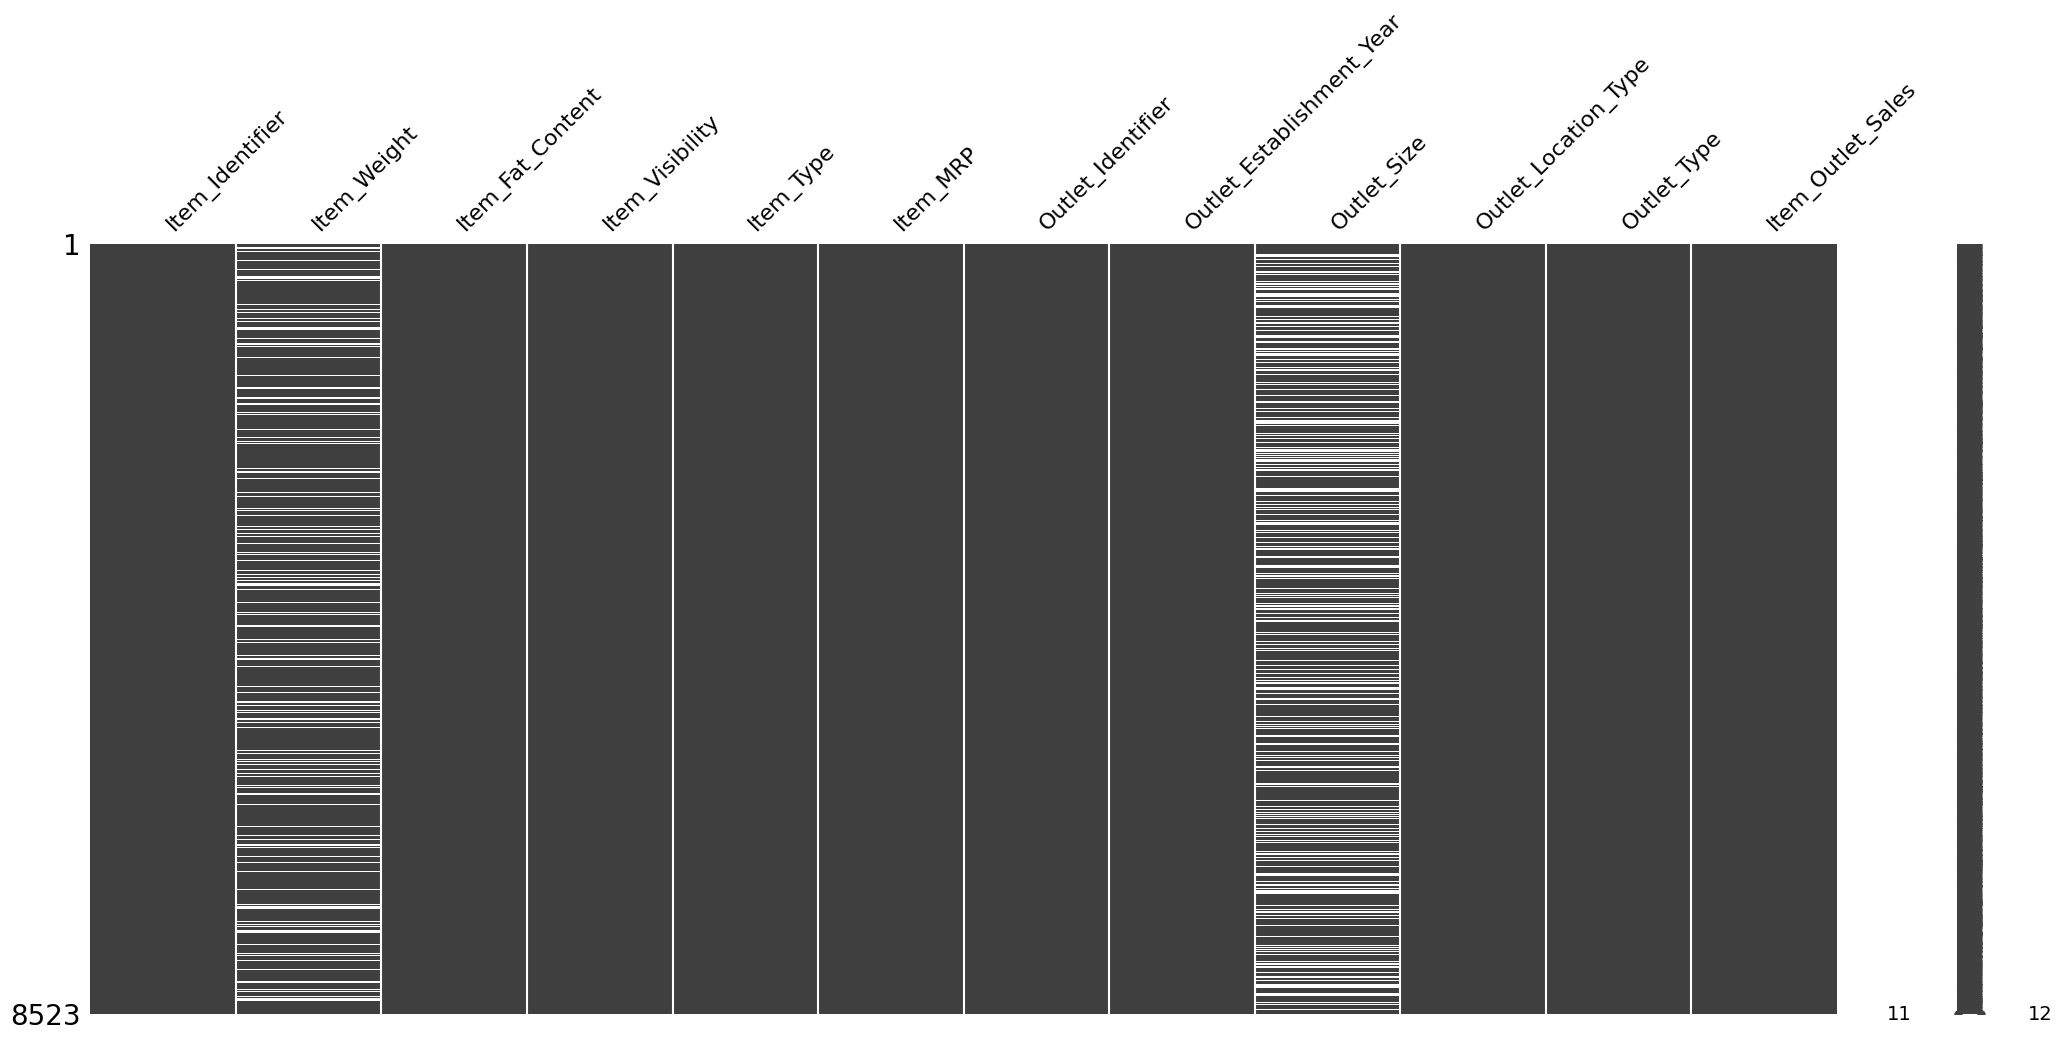

In [101]:
#Visualizing Null values with missingno; importing libraries as well
import missingno as msno
msno.matrix(df_predict)

- Addressing missing values

In [102]:
# Displaying number columns
num_cols = df_predict.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [103]:
# Displaying object cols
cat_cols = df_predict.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [104]:
# Identify string columns to look for discrepancies
string_cols = df_predict.select_dtypes("object").columns
string_cols
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df_predict[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')


Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [105]:
# Fixing discrepancies that are shown in Item_Fat_Content
df_predict['Item_Fat_Content'] = df_predict['Item_Fat_Content'].replace('reg', 'Regular')
df_predict['Item_Fat_Content'] = df_predict['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_predict['Item_Fat_Content'] = df_predict['Item_Fat_Content'].replace('LF', 'Low Fat')
df_predict['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [106]:
# Statistical analysis of the dataframe (Max, Min, Mean)
df_predict.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


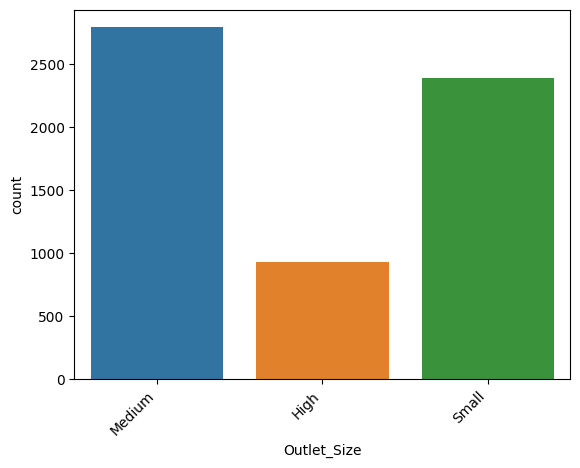

In [107]:
# Evaluating the Outlet Size column's counts

ax = sns.countplot(data = df_predict, x = 'Outlet_Size')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

- Medium and Small more prevalent than High

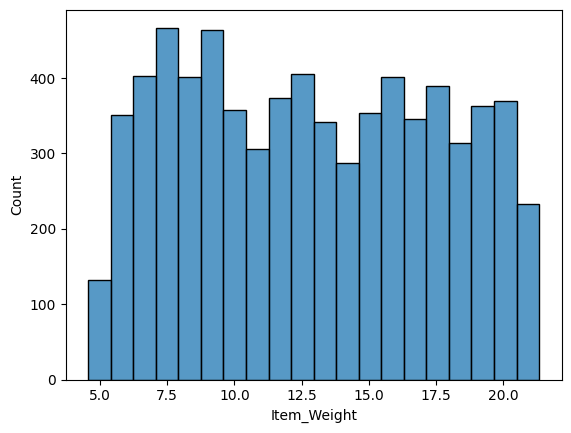

In [108]:
# Distribution of Item Weight
ax = sns.histplot(data = df_predict, x = 'Item_Weight')

-  Doesn't necessarily follow the normal bell curve that could easily distinguish the mean.  Fairly evenly distributed throughout.  

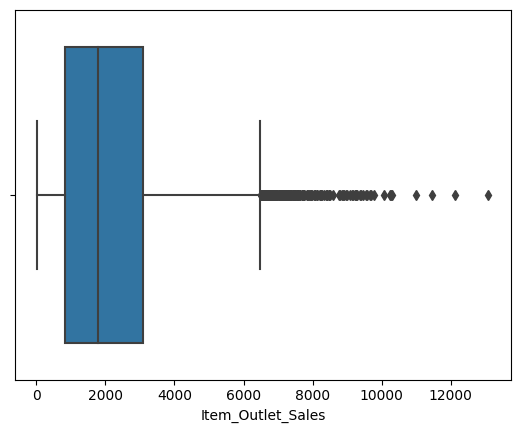

In [109]:
# Create a boxplot of for Outlet Sales
ax = sns.boxplot(data=df_predict, x= 'Item_Outlet_Sales')

- Median sales close to 2000.  There are tons of outliers that seem to be hard to determine from this view.

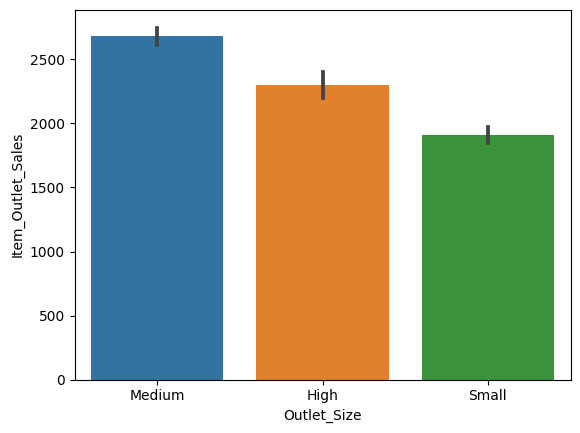

In [110]:
# Plotting Item Sales vs Outlet Size
ax = sns.barplot(data = df_predict, y = 'Item_Outlet_Sales', x ='Outlet_Size')

- Medium seems to be outperforming the lot

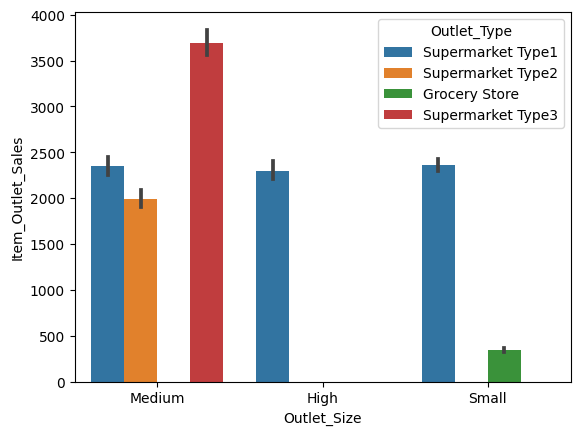

In [111]:
# Plotting Item Sales vs Outlet Size
ax = sns.barplot(data = df_predict, y = 'Item_Outlet_Sales', x ='Outlet_Size', hue='Outlet_Type')

# Further breaking this down by Type of store

In [112]:
# Defining variable for heatmap....Adding annotation to see the values
corr = df_predict.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


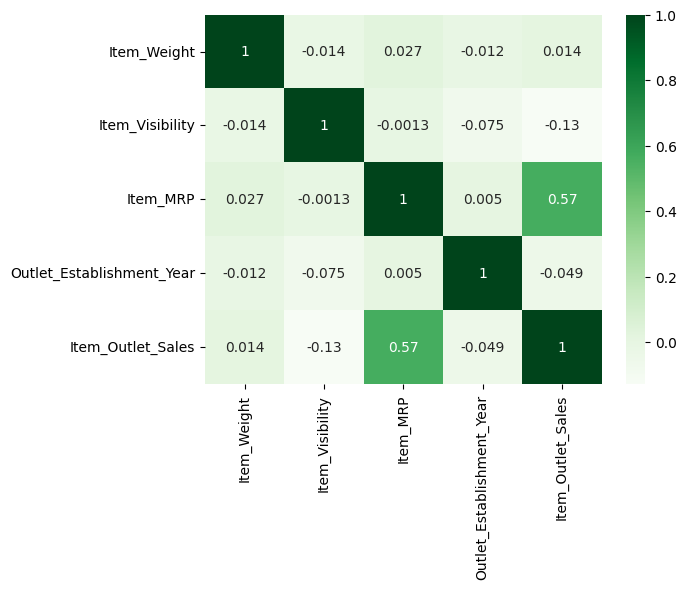

In [113]:
# Adding annotation to see the values
sns.heatmap(corr, cmap = 'Greens', annot = True);

- It is a correlation between item_mrp an item_outlet_sales, however not that strong.   Looks to be at 0.57, with 1 being the strongest.

## Exploratory Data Analysis

### Objects: Item_Identifier, Item_Fat_Content, , Item_Type, Item_Fat_Content, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type

### Numeric Values: Item_Weight, Item_Visibility, Item_MRP Outlet_Establishment_Year', 'Item_Outlet_Sales
      


- Inspecting Categorical

In [143]:
feature_one = "Item_Identifier"
feature_two = "Item_Fat_Content"
feature_three = "Item_Type"
feature_four = "Outlet_Identifier"
feature_five = "Outlet_Size"
feature_six = "Outlet_Location_Type"
feature_seven = "Outlet_Type"

## Explanatory Data Analysis

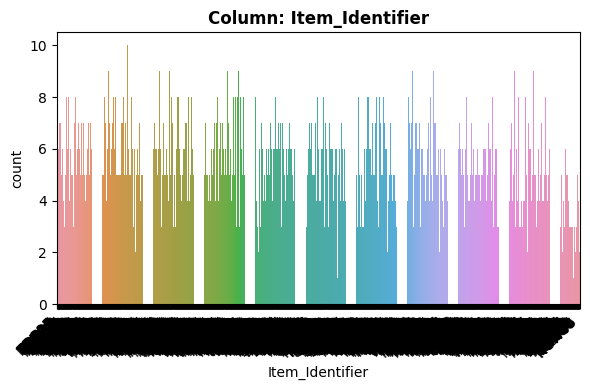

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [144]:
# Calling our custom EDA function
explore_categorical(df_predict, feature_one, placeholder='NaN');

 - What type of feature is it? (Categorical (nominal), ordinal, numeric):  CATEGORICAL
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) : ZERO NULLs
  - Is the feature constant or quasi-constant?  :  NO, most common shows .12%
  - What is the cardinality? Is it high (>10)?  : 1559, Yes
  - Would we know this feature before the target is determined? :  Yes
  - Is there a business case/understanding reason to exclude based on our business case? :  Yes, this is just an identifier.  Most likely used in stores to lump products together.  

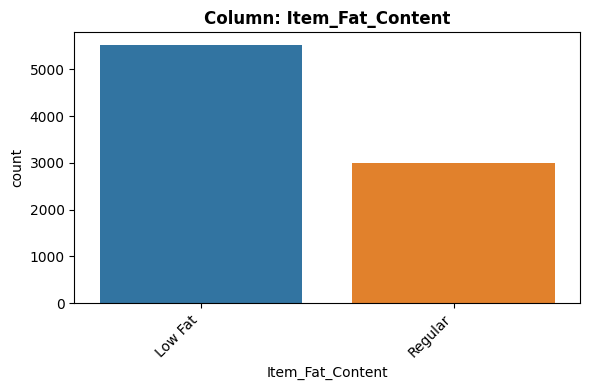

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [145]:
# Calling our custom EDA function
explore_categorical(df_predict, feature_two, placeholder='NaN');

 - What type of feature is it? (Categorical (nominal), ordinal, numeric):  CATEGORICAL
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) : ZERO NULLs
  - Is the feature constant or quasi-constant?  :  NO, most common shows .12%
  - What is the cardinality? Is it high (>10)?  : 2, No
  - Would we know this feature before the target is determined? :  Yes
  - Is there a business case/understanding reason to exclude based on our business case? :  Possibly,  Maybe the store is a store that promotes diet food.  This could determine sales.  

- Multivariate Viz

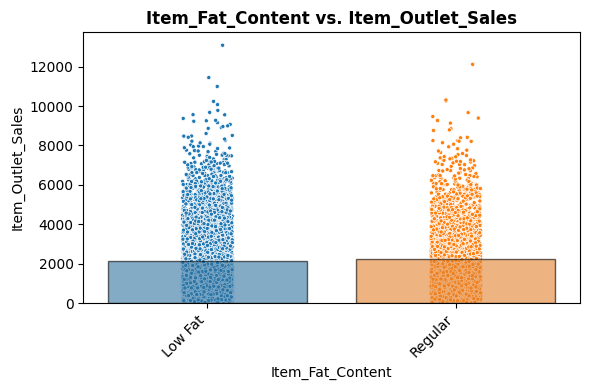

In [146]:
# Calling our custom EDA function
plot_categorical_vs_target(df_predict, feature_two, feature_twel);

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I would expect that fat content would be somewhat of a driver for sales.
- Does this feature appear to be a predictor of the target?
  - No, it appears to be pretty even across the board.

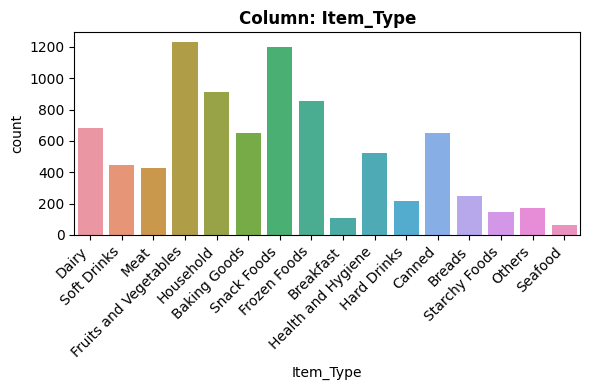

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [147]:
# Calling our custom EDA function
explore_categorical(df_predict, feature_three, placeholder='NaN');

 - What type of feature is it? (Categorical (nominal), ordinal, numeric):  CATEGORICAL
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) : ZERO NULLs
  - Is the feature constant or quasi-constant?  :  NO, most common shows 14%
  - What is the cardinality? Is it high (>10)?  : 16, Yes
  - Would we know this feature before the target is determined? :  Yes
  - Is there a business case/understanding reason to exclude based on our business case? :  No, the type of Item definitly plays a role in the about of sales.  

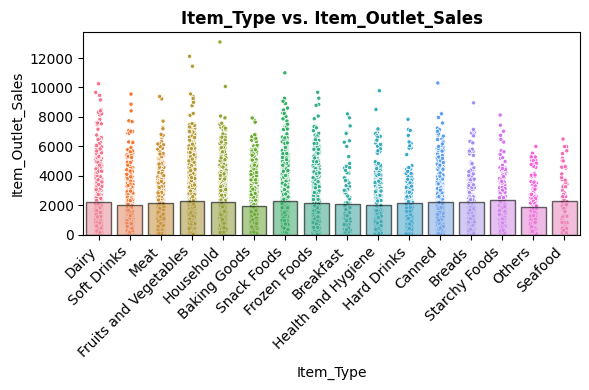

In [148]:
# Calling our custom EDA function
plot_categorical_vs_target(df_predict, feature_three, feature_twel);

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I would expect that the type of item would be a factor in sales.
- Does this feature appear to be a predictor of the target?
  - No, again....it appears to be pretty even across the board.  There are some outliers in Veges and Household goods...but there is no clear distinction.  

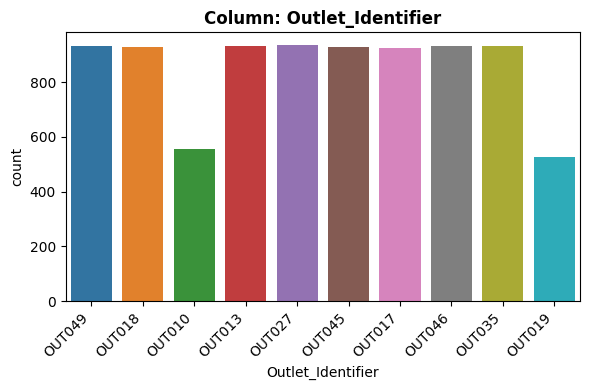

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [149]:
# Calling our custom EDA function
explore_categorical(df_predict, feature_four, placeholder='NaN');

 - What type of feature is it? (Categorical (nominal), ordinal, numeric):  CATEGORICAL
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) : ZERO NULLs
  - Is the feature constant or quasi-constant?  :  NO, most common shows .12%
  - What is the cardinality? Is it high (>10)?  : 10, No...equal to 10
  - Would we know this feature before the target is determined? :  Yes
  - Is there a business case/understanding reason to exclude based on our business case? :  Yes, this is just an identifier for stores.  

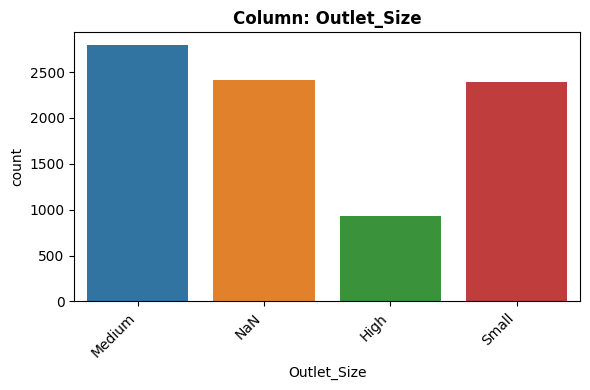

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [150]:
# Calling our custom EDA function
explore_categorical(df_predict, feature_five, placeholder='NaN');

 - What type of feature is it? (Categorical (nominal), ordinal, numeric):  Ordinal
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) : 2410 NULLs making up 28.28%.  I would impute to MISSING.  The data dictionary doesn't imply that this should change or is super important.  
  - Is the feature constant or quasi-constant?  :  NO, most common shows 28%
  - What is the cardinality? Is it high (>10)?  : 4, No
  - Would we know this feature before the target is determined? :  Yes
  - Is there a business case/understanding reason to exclude based on our business case? : Possibly, some customers like larger stores when shopping and some like smaller (more customer friendly in some cases...people tend to know locals).

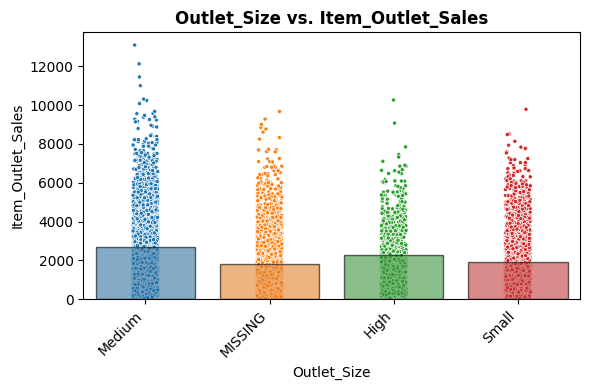

In [151]:
# Calling our custom EDA function
plot_categorical_vs_target(df_predict, feature_five, feature_twel);

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I would expect that the outlet size would be a driver for sales.
- Does this feature appear to be a predictor of the target?
  - Not 100 percent clear, but, it appears that the medium size store has a bit of an edge on the others; however, we don't know what the missing values are and what category they belong to.  That could determine a lot.

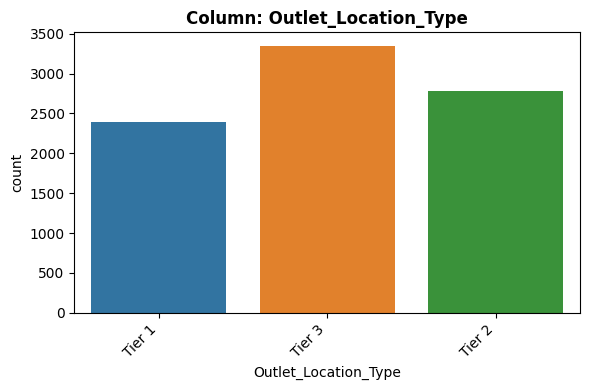

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [152]:
# Calling our custom EDA function
explore_categorical(df_predict, feature_six, placeholder='NaN');

 - What type of feature is it? (Categorical (nominal), ordinal, numeric):  Ordinal
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) : ZERO NULLs
  - Is the feature constant or quasi-constant?  :  NO, most common shows 39%
  - What is the cardinality? Is it high (>10)?  : 3, No
  - Would we know this feature before the target is determined? :  Yes
  - Is there a business case/understanding reason to exclude based on our business case? :  No, The location type would defintely play a big factor in sales.  

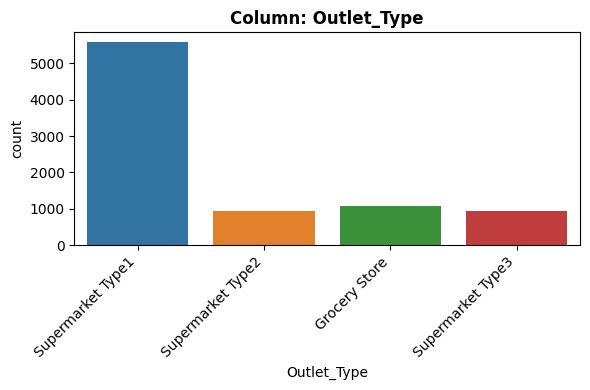

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [153]:
# Calling our custom EDA function
explore_categorical(df_predict, feature_seven, placeholder='NaN');

 - What type of feature is it? (Categorical (nominal), ordinal, numeric):  CATEGORICAL
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) : ZERO NULLs
  - Is the feature constant or quasi-constant?  :  NO, most common shows 65%
  - What is the cardinality? Is it high (>10)?  : 4, no
  - Would we know this feature before the target is determined? :  Yes
  - Is there a business case/understanding reason to exclude based on our business case? :  No, the type of market would play a factor in sales as well.  

In [154]:
feature_eight = "Item_Weight"
feature_nine = "Item_Visibility"
feature_ten = "Item_MRP"
feature_ele = "Outlet_Establishment_Year"
feature_twel = "Item_Outlet_Sales"


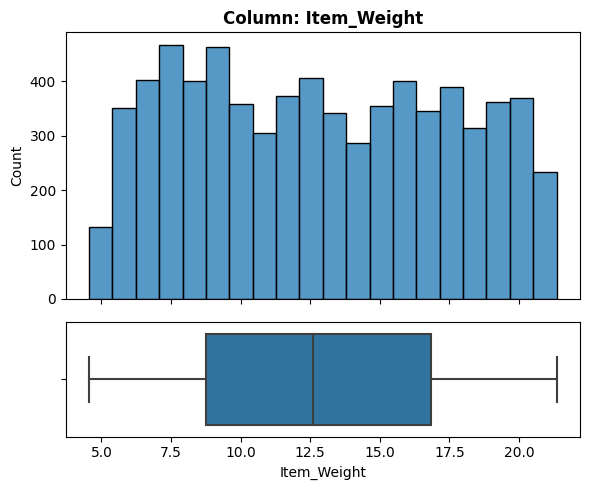

- NaN's Found: 1463 (17.17%)


In [155]:
# Calling our custom EDA function
explore_numeric(df_predict, feature_eight);

 - What type of feature is it? (Categorical (nominal), ordinal, numeric) :  NUMERIC
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) :  1463 NULL at a percentage of 17%

  - They seem to be missing a random.  Could be related to shrinkage.  

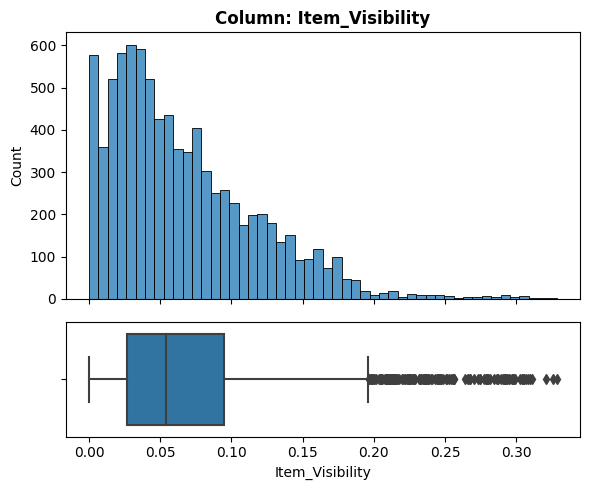

- NaN's Found: 0 (0.0%)


In [156]:
# Calling our custom EDA function
explore_numeric(df_predict, feature_nine);

 - What type of feature is it? (Categorical (nominal), ordinal, numeric) :  NUMERIC
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) :  ZERO NULL

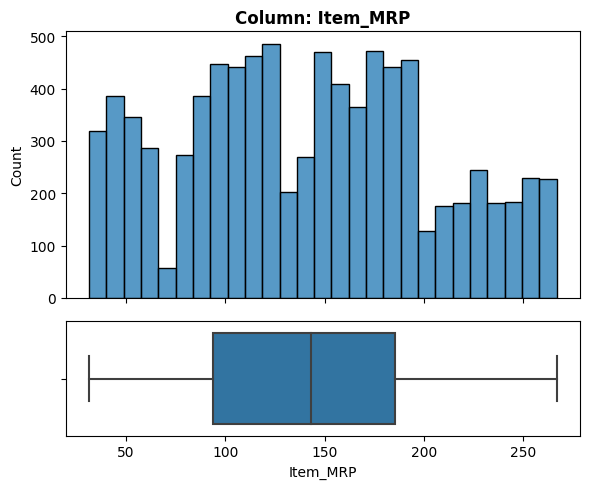

- NaN's Found: 0 (0.0%)


In [157]:
# Calling our custom EDA function
explore_numeric(df_predict, feature_ten);

 - What type of feature is it? (Categorical (nominal), ordinal, numeric) :  NUMERIC
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) :  ZERO NULL

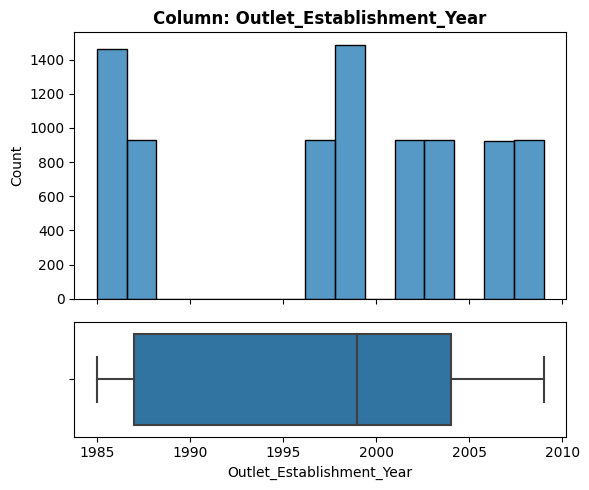

- NaN's Found: 0 (0.0%)


In [158]:
# Calling our custom EDA function
explore_numeric(df_predict, feature_ele);

 - What type of feature is it? (Categorical (nominal), ordinal, numeric) :  NUMERIC
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) :  ZERO NULL

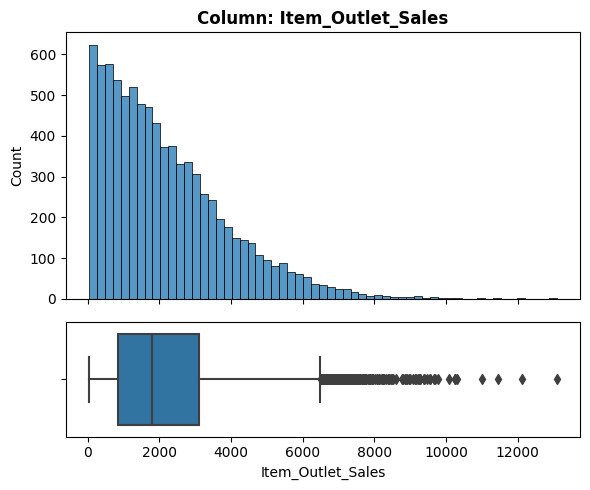

- NaN's Found: 0 (0.0%)


In [159]:
# Calling our custom EDA function
explore_numeric(df_predict, feature_twel);

 - What type of feature is it? (Categorical (nominal), ordinal, numeric) :  NUMERIC
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) :  ZERO NULL
  
  This is my target

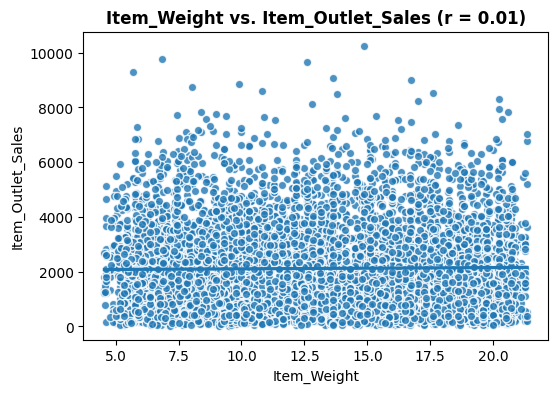

In [189]:
# Calling our custom EDA function
plot_numeric_vs_target(df_predict, feature_eight);


- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No, I would not expect that the Item Weight would be a driver for sales.
- Does this feature appear to be a predictor of the target?
  - No or neutral correlation.  As X increases, Y stays the same.  

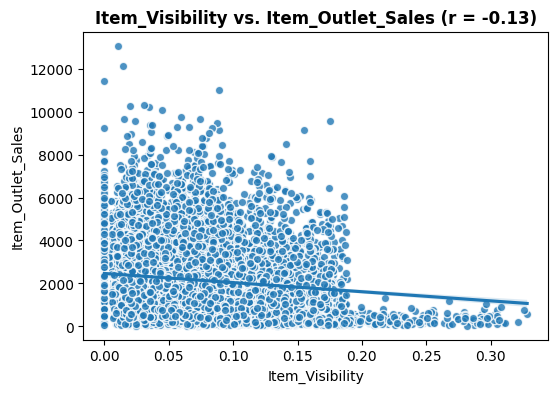

In [186]:
# Calling our custom EDA function
plot_numeric_vs_target(df_predict, feature_nine);

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No, I would not expect that the Item Visibility would be a driver for sales.
- Does this feature appear to be a predictor of the target?
  - Negative correlation.  As X increases, Y decreases.  

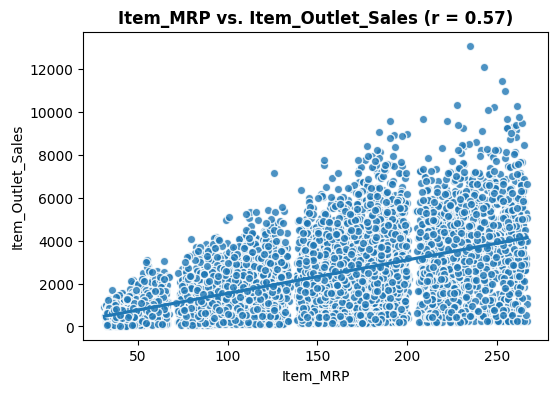

In [187]:
# Calling our custom EDA function
plot_numeric_vs_target(df_predict, feature_ten);

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I would expect that the Item MRP would be a driver for sales.
- Does this feature appear to be a predictor of the target?
  - This is a pretty positive correlation with r at 0.57.  X increases and so does Y.  Which makes sense, it's the actual list price.  Actual price includes markup for profit.  

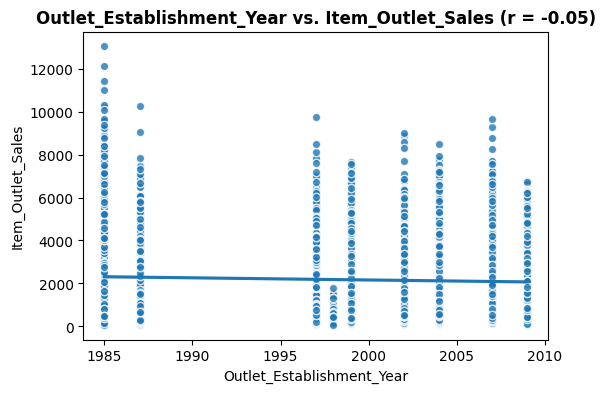

In [188]:
# Calling our custom EDA function
plot_numeric_vs_target(df_predict, feature_ele);

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - I think that it's possible, because customer base could change (+/-) throughout the years.  
- Does this feature appear to be a predictor of the target?
  - No, it has a negative r and Y(sales) decrease as the years change.  